In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [144]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=500)
x, mean_x, std_x = standardize(X)

In [145]:
x.shape

(500, 2)

Use `least_squares` to compute w, and visualize the results.

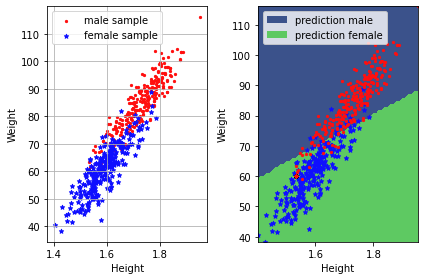

In [146]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # classify the data by linear regression:
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    w, mse = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [147]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    return 1 / (1 + np.exp(-t))
    # ***************************************************

In [148]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    loss = np.sum(np.log(1+np.exp(tx.dot(w))), axis=0) - y.T.dot(tx.dot(w))
    # ***************************************************
    return np.squeeze(loss)

In [149]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    g = tx.T.dot(sigmoid(tx.dot(w))-y)
    # ***************************************************
    return g

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [150]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # compute the loss:
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    
    # ***************************************************
    # compute the gradient:
    g = calculate_gradient(y, tx, w)
    # ***************************************************
    
    # ***************************************************
    # update w:
    w = w - gamma * g
    # ***************************************************

    return loss, w

Demo!

Current iteration=0, loss=346.5735902799727
Current iteration=100, loss=99.99501112852647
Current iteration=200, loss=98.46901149237715
Current iteration=300, loss=98.30607732087151
Current iteration=400, loss=98.28388453739467
Current iteration=500, loss=98.2806164047197
Current iteration=600, loss=98.28012120444555
Current iteration=700, loss=98.28004534663887
Current iteration=800, loss=98.28003367689428
loss=98.2800320642956


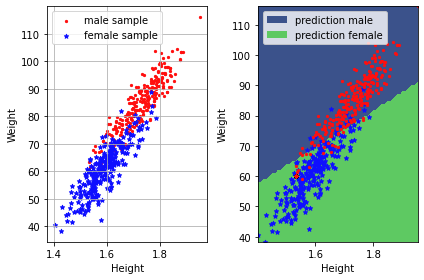

In [151]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [152]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    pred = sigmoid(tx.dot(w)).squeeze()
    pred = np.diag(pred.T)
    r = np.multiply(pred, (1-pred))
    return tx.T.dot(r).dot(tx)

Write a function below to return loss, gradient, and Hessian.

In [153]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # return loss, gradient, and Hessian:
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    # ***************************************************
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [154]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # return loss, gradient and Hessian:
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # ***************************************************
  
    # ***************************************************
    # update w:
    w = w - gamma * np.linalg.solve(hessian, gradient)
    # ***************************************************
    return loss, w

demo

Current iteration=0, the loss=346.5735902799727
Current iteration=1, the loss=157.37931233381835
Current iteration=2, the loss=115.84445687773803
Current iteration=3, the loss=101.58337023152774
Current iteration=4, the loss=98.50200771244295
Current iteration=5, the loss=98.28160690484879
Current iteration=6, the loss=98.28003164455811
Current iteration=7, the loss=98.28003155083775
Current iteration=8, the loss=98.2800315508382
loss=98.28003155083809


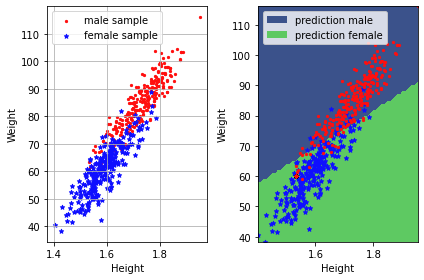

In [155]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [156]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # return loss, gradient, and Hessian:
    loss, gradient, hessian = logistic_regression(y, tx, w)
    
    loss = loss + lambda_ * w.T.dot(w).squeeze()
    gradient = gradient + 2 * lambda_ * w
    # ***************************************************
    return loss, gradient

In [157]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # return loss, gradient:
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************

    # ***************************************************
    # update w:
    w = w - gamma * gradient
    # ***************************************************

    return loss, w

Current iteration=0, loss=346.5735902799727
Current iteration=100, loss=105.1132532284646
Current iteration=200, loss=104.43518294380686
Current iteration=300, loss=104.40488312268708
Current iteration=400, loss=104.40329986963108
Current iteration=500, loss=104.40321435931921
loss=99.16529252922703


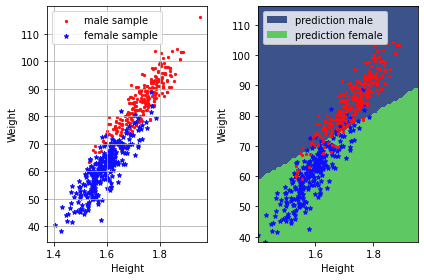

In [158]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)